In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf
from pathlib import Path

In [2]:
file_path = Path('../Machine Learning/fight_id_top39_test.csv')
fighter_df = pd.read_csv(file_path)
fighter_df.head(10)

,Results,avg_SIG_STR_pct,avg_opp_SIG_STR_pct,avg_SIG_STR_landed,avg_TOTAL_STR_landed,avg_opp_TOTAL_STR_att,avg_opp_TOTAL_STR_landed,avg_HEAD_landed,avg_opp_HEAD_landed,avg_CTRL_time(seconds),avg_opp_CTRL_time(seconds)
0,1,0.610465,0.556651,25.203863,39.493837,103.648148,68.976960,15.223542,31.815940,284.080065,361.640729
1,1,0.541862,0.476602,30.815453,50.975348,70.592592,44.907840,21.894167,16.263761,491.320261,9.562915
2,1,0.493724,0.533204,15.630906,19.950697,47.185184,25.815680,9.788334,16.527523,122.640521,11.125829
3,1,0.469789,0.565636,23.047252,30.605575,83.481468,45.525438,15.306670,28.220183,66.124170,57.006634
4,1,0.299155,0.462543,32.189006,37.422298,133.925873,65.101753,20.226682,31.880733,57.496679,170.026536
5,1,0.409722,0.488094,34.666473,48.726578,117.688995,67.819382,16.881622,23.540924,263.012970,96.496994
6,1,0.276622,0.400171,35.756025,44.689194,169.703493,71.407013,18.906727,50.522934,57.986715,114.106146
7,1,0.399444,0.416189,48.332947,60.453156,99.377991,42.638763,26.763245,26.081848,116.025940,9.993988
8,1,0.272975,0.471371,37.048203,57.513550,155.627945,78.256104,26.253815,50.183472,149.893722,93.849167
9,1,0.318887,0.402377,61.665894,78.906311,166.755981,71.277527,33.526489,47.163696,157.051880,16.987976


In [3]:
fighter_df = fighter_df.dropna()
fighter_df.head(10)

,Results,avg_SIG_STR_pct,avg_opp_SIG_STR_pct,avg_SIG_STR_landed,avg_TOTAL_STR_landed,avg_opp_TOTAL_STR_att,avg_opp_TOTAL_STR_landed,avg_HEAD_landed,avg_opp_HEAD_landed,avg_CTRL_time(seconds),avg_opp_CTRL_time(seconds)
0,1,0.610465,0.556651,25.203863,39.493837,103.648148,68.976960,15.223542,31.815940,284.080065,361.640729
1,1,0.541862,0.476602,30.815453,50.975348,70.592592,44.907840,21.894167,16.263761,491.320261,9.562915
2,1,0.493724,0.533204,15.630906,19.950697,47.185184,25.815680,9.788334,16.527523,122.640521,11.125829
3,1,0.469789,0.565636,23.047252,30.605575,83.481468,45.525438,15.306670,28.220183,66.124170,57.006634
4,1,0.299155,0.462543,32.189006,37.422298,133.925873,65.101753,20.226682,31.880733,57.496679,170.026536
5,1,0.409722,0.488094,34.666473,48.726578,117.688995,67.819382,16.881622,23.540924,263.012970,96.496994
6,1,0.276622,0.400171,35.756025,44.689194,169.703493,71.407013,18.906727,50.522934,57.986715,114.106146
7,1,0.399444,0.416189,48.332947,60.453156,99.377991,42.638763,26.763245,26.081848,116.025940,9.993988
8,1,0.272975,0.471371,37.048203,57.513550,155.627945,78.256104,26.253815,50.183472,149.893722,93.849167
9,1,0.318887,0.402377,61.665894,78.906311,166.755981,71.277527,33.526489,47.163696,157.051880,16.987976


In [4]:
y = fighter_df["Results"]
X = fighter_df.drop(columns="Results")

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
   y,  random_state=1, stratify=y)
X_train.shape

(326, 10)

In [6]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [8]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=30, activation="relu", input_dim=10))

In [9]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [10]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                330       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [12]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=1000)

Epoch 1/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.7301 - accuracy: 0.4847
Epoch 2/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.7158 - accuracy: 0.4785
Epoch 3/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.7055 - accuracy: 0.5031
Epoch 4/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.6982 - accuracy: 0.4939
Epoch 5/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5184
Epoch 6/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5276
Epoch 7/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.6863 - accuracy: 0.5337
Epoch 8/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.6832 - accuracy: 0.5399
Epoch 9/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.6812 - accuracy: 0.5429
Epoch 10/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.6786 - accuracy: 0.5399

11/11 [==============================] - 0s 1ms/step - loss: 0.6221 - accuracy: 0.6503
Epoch 83/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.6212 - accuracy: 0.6626
Epoch 84/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.6203 - accuracy: 0.6656
Epoch 85/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.6198 - accuracy: 0.6687
Epoch 86/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.6205 - accuracy: 0.6656
Epoch 87/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.6193 - accuracy: 0.6656
Epoch 88/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.6183 - accuracy: 0.6840
Epoch 89/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.6181 - accuracy: 0.6902
Epoch 90/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.6182 - accuracy: 0.6779
Epoch 91/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.6175 - accuracy: 0.6810
Epoc

11/11 [==============================] - 0s 1ms/step - loss: 0.5892 - accuracy: 0.7117
Epoch 163/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.5885 - accuracy: 0.7117
Epoch 164/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.5884 - accuracy: 0.7025
Epoch 165/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.5877 - accuracy: 0.6963
Epoch 166/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.5871 - accuracy: 0.7086
Epoch 167/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.5868 - accuracy: 0.7025
Epoch 168/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.5869 - accuracy: 0.6840
Epoch 169/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.5865 - accuracy: 0.6810
Epoch 170/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.5861 - accuracy: 0.6810
Epoch 171/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.5859 - accuracy: 0.

11/11 [==============================] - 0s 2ms/step - loss: 0.5622 - accuracy: 0.7239
Epoch 243/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.5602 - accuracy: 0.7239
Epoch 244/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.5598 - accuracy: 0.7331
Epoch 245/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.5596 - accuracy: 0.7331
Epoch 246/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.5592 - accuracy: 0.7301
Epoch 247/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.5589 - accuracy: 0.7239
Epoch 248/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.5586 - accuracy: 0.7331
Epoch 249/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.5586 - accuracy: 0.7331
Epoch 250/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.5590 - accuracy: 0.7362
Epoch 251/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.5582 - accuracy: 0.

11/11 [==============================] - 0s 2ms/step - loss: 0.5380 - accuracy: 0.7546
Epoch 323/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.5376 - accuracy: 0.7607
Epoch 324/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.5369 - accuracy: 0.7577
Epoch 325/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.5359 - accuracy: 0.7638
Epoch 326/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.5358 - accuracy: 0.7607
Epoch 327/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.5367 - accuracy: 0.7515
Epoch 328/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.5354 - accuracy: 0.7485
Epoch 329/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.5346 - accuracy: 0.7577
Epoch 330/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.5345 - accuracy: 0.7577
Epoch 331/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.5340 - accuracy: 0.

11/11 [==============================] - 0s 1ms/step - loss: 0.5152 - accuracy: 0.7822
Epoch 403/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.5140 - accuracy: 0.7822
Epoch 404/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.5151 - accuracy: 0.7638
Epoch 405/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.5129 - accuracy: 0.7577
Epoch 406/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.5118 - accuracy: 0.7607
Epoch 407/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.5124 - accuracy: 0.7699
Epoch 408/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.5122 - accuracy: 0.7822
Epoch 409/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.5121 - accuracy: 0.7791
Epoch 410/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.5113 - accuracy: 0.7761
Epoch 411/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.5105 - accuracy: 0.

11/11 [==============================] - 0s 2ms/step - loss: 0.4909 - accuracy: 0.7945
Epoch 483/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4904 - accuracy: 0.7945
Epoch 484/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4904 - accuracy: 0.7883
Epoch 485/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.4898 - accuracy: 0.7975
Epoch 486/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4896 - accuracy: 0.8006
Epoch 487/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.4905 - accuracy: 0.7975
Epoch 488/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.4894 - accuracy: 0.7945
Epoch 489/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4919 - accuracy: 0.7914
Epoch 490/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4913 - accuracy: 0.7822
Epoch 491/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.4905 - accuracy: 0.

11/11 [==============================] - 0s 2ms/step - loss: 0.4715 - accuracy: 0.8098
Epoch 563/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4711 - accuracy: 0.8067
Epoch 564/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.8098
Epoch 565/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.4706 - accuracy: 0.8129
Epoch 566/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4699 - accuracy: 0.8160
Epoch 567/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4700 - accuracy: 0.8129
Epoch 568/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4693 - accuracy: 0.8067
Epoch 569/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.8037
Epoch 570/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.8037
Epoch 571/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.

11/11 [==============================] - 0s 2ms/step - loss: 0.4513 - accuracy: 0.8252
Epoch 643/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4510 - accuracy: 0.8282
Epoch 644/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.4500 - accuracy: 0.8252
Epoch 645/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.4514 - accuracy: 0.8252
Epoch 646/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.4501 - accuracy: 0.8313
Epoch 647/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4509 - accuracy: 0.8221
Epoch 648/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4493 - accuracy: 0.8221
Epoch 649/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4491 - accuracy: 0.8252
Epoch 650/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.4506 - accuracy: 0.8313
Epoch 651/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.4483 - accuracy: 0.

11/11 [==============================] - 0s 2ms/step - loss: 0.4303 - accuracy: 0.8374
Epoch 723/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4309 - accuracy: 0.8252
Epoch 724/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.4323 - accuracy: 0.8190
Epoch 725/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4314 - accuracy: 0.8252
Epoch 726/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.4296 - accuracy: 0.8282
Epoch 727/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.4296 - accuracy: 0.8252
Epoch 728/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4289 - accuracy: 0.8313
Epoch 729/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.4293 - accuracy: 0.8374
Epoch 730/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.4289 - accuracy: 0.8405
Epoch 731/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.4284 - accuracy: 0.

11/11 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8405
Epoch 803/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8374
Epoch 804/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.4134 - accuracy: 0.8344
Epoch 805/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4136 - accuracy: 0.8405
Epoch 806/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.4124 - accuracy: 0.8405
Epoch 807/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.4120 - accuracy: 0.8374
Epoch 808/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.4119 - accuracy: 0.8344
Epoch 809/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy: 0.8436
Epoch 810/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.8436
Epoch 811/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.

11/11 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.8374
Epoch 883/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3983 - accuracy: 0.8313
Epoch 884/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.8405
Epoch 885/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.8436
Epoch 886/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.3980 - accuracy: 0.8436
Epoch 887/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.3998 - accuracy: 0.8466
Epoch 888/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.3978 - accuracy: 0.8497
Epoch 889/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.3983 - accuracy: 0.8405
Epoch 890/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3980 - accuracy: 0.8405
Epoch 891/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3976 - accuracy: 0.

11/11 [==============================] - 0s 1ms/step - loss: 0.3859 - accuracy: 0.8589
Epoch 963/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3845 - accuracy: 0.8558
Epoch 964/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3879 - accuracy: 0.8589
Epoch 965/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.3846 - accuracy: 0.8620
Epoch 966/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.3833 - accuracy: 0.8466
Epoch 967/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.3860 - accuracy: 0.8497
Epoch 968/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.3847 - accuracy: 0.8497
Epoch 969/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.3831 - accuracy: 0.8528
Epoch 970/1000
11/11 [==============================] - 0s 2ms/step - loss: 0.3826 - accuracy: 0.8497
Epoch 971/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.3829 - accuracy: 0.

<AxesSubplot:>

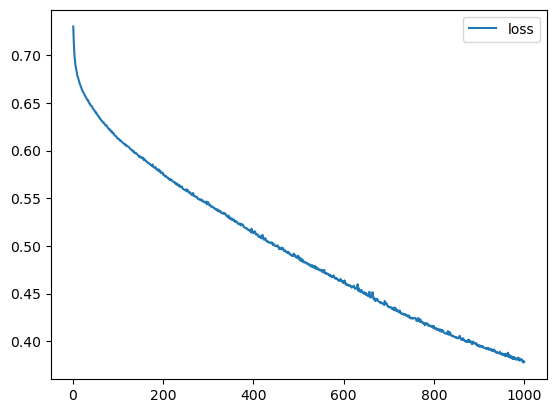

In [13]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

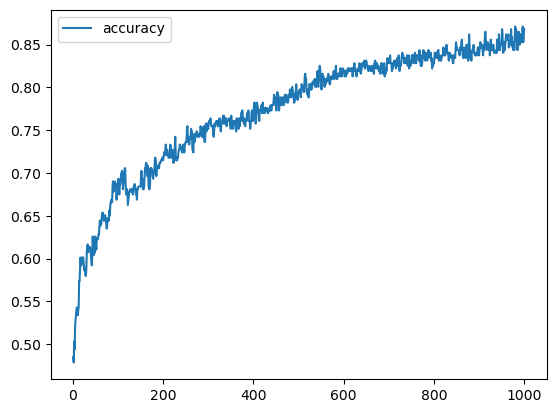

In [14]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

4/4 - 0s - loss: 0.8869 - accuracy: 0.5505 - 133ms/epoch - 33ms/step
Loss: 0.8868889212608337, Accuracy: 0.5504587292671204


In [16]:
nn_model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


array([[0.0000000e+00],
       [0.0000000e+00],
       [8.0570982e-34],
       [7.6441593e-03],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [9.9998689e-01],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [2.9132405e-01],
       [0.0000000e+00],
       [9.9995768e-01],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [3.7083745e-28],
       [1.0546783e-34],
       [1.5680593e-26],
       [7.4776655e-38],
       [0.0000000e+00],
       [1.3229406e-02],
       [1.6907272e-36],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [8.4846473e-01],
       [5.4893893e-13],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [2.0620962e-25],
       [5.4764200e-36],
       [6.5912255e-13],
       [8.1112193e-19],
       [8.9246695e-16],
       [0.0000000e+00],
       [6.0893723e-07],
       [0.0000000e+00],
       [3.350148